In [1]:
import pandas as pd
import wikipedia
import os
from tqdm import tqdm
from joblib import Parallel, delayed
import multiprocessing
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
from IPython.display import display
import json
num_cores = multiprocessing.cpu_count()
print(num_cores)
wikipedia.set_lang("ru")
# DATA_PATH_LIST = ['D:','src2','taxonomy-enrichment','data','training_data']
DATA_PATH_LIST = ['.']
EMBEDDING_MODEL_FILENAME = "wiki_node2vec.bin"
DATA_PATH="/".join(DATA_PATH_LIST+["training_nouns.tsv"])
df = pd.read_csv(DATA_PATH,sep='\t')
%matplotlib inline

8


In [2]:
def prestr(x):
    return str(x).replace('\"','').replace("'",'"')

In [3]:
class DefDict(defaultdict):
    def __missing__(self, key):
        self[key] = key
        return key
    
idx2syns = DefDict(lambda x:x)
for val in df.values:
    idx2syns[val[0]]=val[1]
    try:
        pidxs = json.loads(prestr(val[2]))
        concp = [el.split(",")[0] for el in json.loads(prestr(val[3]))]
        idx2syns.update(dict(zip(pidxs,concp)))
    except:
        print(prestr(val[2]))
        print(prestr(val[3]))

In [4]:
button = widgets.Button(description="Draw")
query = widgets.Text(
    value='МАТЬ',
    placeholder='Query',
    description='String:',
    disabled=False
)
display(button,query)




def creategraph(df):
    res = []
    for row in df.values:
        cohyps = row[1].split(",")
        for idx,cohyp in enumerate(cohyps):
            for parent in json.loads(prestr(row[2])):
                res.append((row[0]+'-'+str(idx),parent))
    return res

def graphdraw(b):
    print("graphdraw",query.value)
    subset = df[df['TEXT'].str.contains(query.value.upper())]
    g = nx.DiGraph()
    for el in subset.values:
        cohyps = el[1].split(",")
        print(cohyps)
        syns = idx2syns[el[0]]
        for child in cohyps:
            for parent in json.loads(prestr(el[2])):
                ed = g.add_edge(child,idx2syns[parent],label="is a")
            
    plt.figure(figsize=(15,15))
    pos = nx.nx_agraph.graphviz_layout(g)
    nx.draw(g,with_labels=True,pos=pos)
#     edge_labels=nx.draw_networkx_edge_labels(g,pos=pos)
    plt.show()
button.on_click(graphdraw)

Button(description='Draw', style=ButtonStyle())

Text(value='МАТЬ', description='String:', placeholder='Query')

graphdraw МАТЬ
['ИГУМЕН МОНАСТЫРЯ', ' ИГУМЕНЬЯ МОНАСТЫРЯ', ' МАТЬ-ИГУМЕНЬЯ', ' ОТЕЦ-ИГУМЕН', ' ИГУМЕНЬЯ', ' ИГУМЕН']
['МОЛОЧНАЯ МАТЬ', ' КОРМИЛИЦА']
['СПОСОБНОСТЬ ПОНИМАТЬ ЗНАЧЕНИЕ СВОИХ ДЕЙСТВИЙ', ' ВМЕНЯЕМОСТЬ']
['СПОСОБНОСТЬ ПОНИМАТЬ ЗНАЧЕНИЕ СВОИХ ДЕЙСТВИЙ', ' ВМЕНЯЕМОСТЬ']
['СУРМАМА', ' СУРРОГАТНАЯ МАМА', ' СУРРОГАТНАЯ МАТЬ', ' СУРРОГАТНОЕ МАТЕРИНСТВО']
['СВЕКРОВЬ', ' МАТЬ МУЖА']
['МАТЬ ЖЕНЫ', ' ТЕЩА']


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

<Figure size 1080x1080 with 0 Axes>

In [5]:
pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  ERROR: Command errored out with exit status 1:
   command: /Users/ilshatkhairakhun/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-jo06j39c/pygraphviz/setup.py'"'"'; __file__='"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-jo06j39c/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-wheel-10s2jo5c --python-tag cp37
       cwd: /private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-jo06j39c/pygraphviz/
  Complete output (55 lines):
  running bdist_wheel
  running build
  running build_py
  creatin

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pygraphviz --install-option="--include-path=/ilshat.khairakhn/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/"

/Users/ilshatkhairakhun/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/commands/install.py:243: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
Skipping bdist_wheel for pygraphviz, due to binaries being disabled for it.
  Running setup.py install for pygraphviz ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/ilshatkhairakhun/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-8r_azwyl/pygraphviz/setup.py'"'"'; __file__='"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-8r_azwyl/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().r

In [8]:
pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  ERROR: Command errored out with exit status 1:
   command: /Users/ilshatkhairakhun/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-mrxaqk8o/pygraphviz/setup.py'"'"'; __file__='"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-mrxaqk8o/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-wheel-uxadudky --python-tag cp37
       cwd: /private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-mrxaqk8o/pygraphviz/
  Complete output (55 lines):
  running bdist_wheel
  running build
  running build_py
  creatin

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pygraphviz --install-option="--include-path=/usr/local/include/graphviz/" --install-option="--library-path=/usr/local/lib/graphviz"

/Users/ilshatkhairakhun/opt/anaconda3/lib/python3.7/site-packages/pip/_internal/commands/install.py:243: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
Skipping bdist_wheel for pygraphviz, due to binaries being disabled for it.
  Running setup.py install for pygraphviz ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/ilshatkhairakhun/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-cxzk8cyc/pygraphviz/setup.py'"'"'; __file__='"'"'/private/var/folders/1s/hwfctqyx43d53gkycv6l5ng40000gn/T/pip-install-cxzk8cyc/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().r

In [10]:
conda install --channel https://conda.anaconda.org/garylschultz pygraphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/ilshatkhairakhun/opt/anaconda3

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.8.2                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pixman-0.38.0              |       h1de35cc_0         341 KB
    pygraphviz-1.3             |   py37h1de35cc_1         108 KB
    ------------------------------------------------

In [11]:
pip show graphviz

Name: graphviz
Version: 0.13.2
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: /Users/ilshatkhairakhun/opt/anaconda3/lib/python3.7/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


Button(description='Draw', style=ButtonStyle())

Text(value='МАТЬ', description='String:', placeholder='Query')

graphdraw МАТЬ
['ИГУМЕН МОНАСТЫРЯ', ' ИГУМЕНЬЯ МОНАСТЫРЯ', ' МАТЬ-ИГУМЕНЬЯ', ' ОТЕЦ-ИГУМЕН', ' ИГУМЕНЬЯ', ' ИГУМЕН']
['МОЛОЧНАЯ МАТЬ', ' КОРМИЛИЦА']
['СПОСОБНОСТЬ ПОНИМАТЬ ЗНАЧЕНИЕ СВОИХ ДЕЙСТВИЙ', ' ВМЕНЯЕМОСТЬ']
['СПОСОБНОСТЬ ПОНИМАТЬ ЗНАЧЕНИЕ СВОИХ ДЕЙСТВИЙ', ' ВМЕНЯЕМОСТЬ']
['СУРМАМА', ' СУРРОГАТНАЯ МАМА', ' СУРРОГАТНАЯ МАТЬ', ' СУРРОГАТНОЕ МАТЕРИНСТВО']
['СВЕКРОВЬ', ' МАТЬ МУЖА']
['МАТЬ ЖЕНЫ', ' ТЕЩА']


/Users/ilshatkhairakhun/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ilshatkhairakhun/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


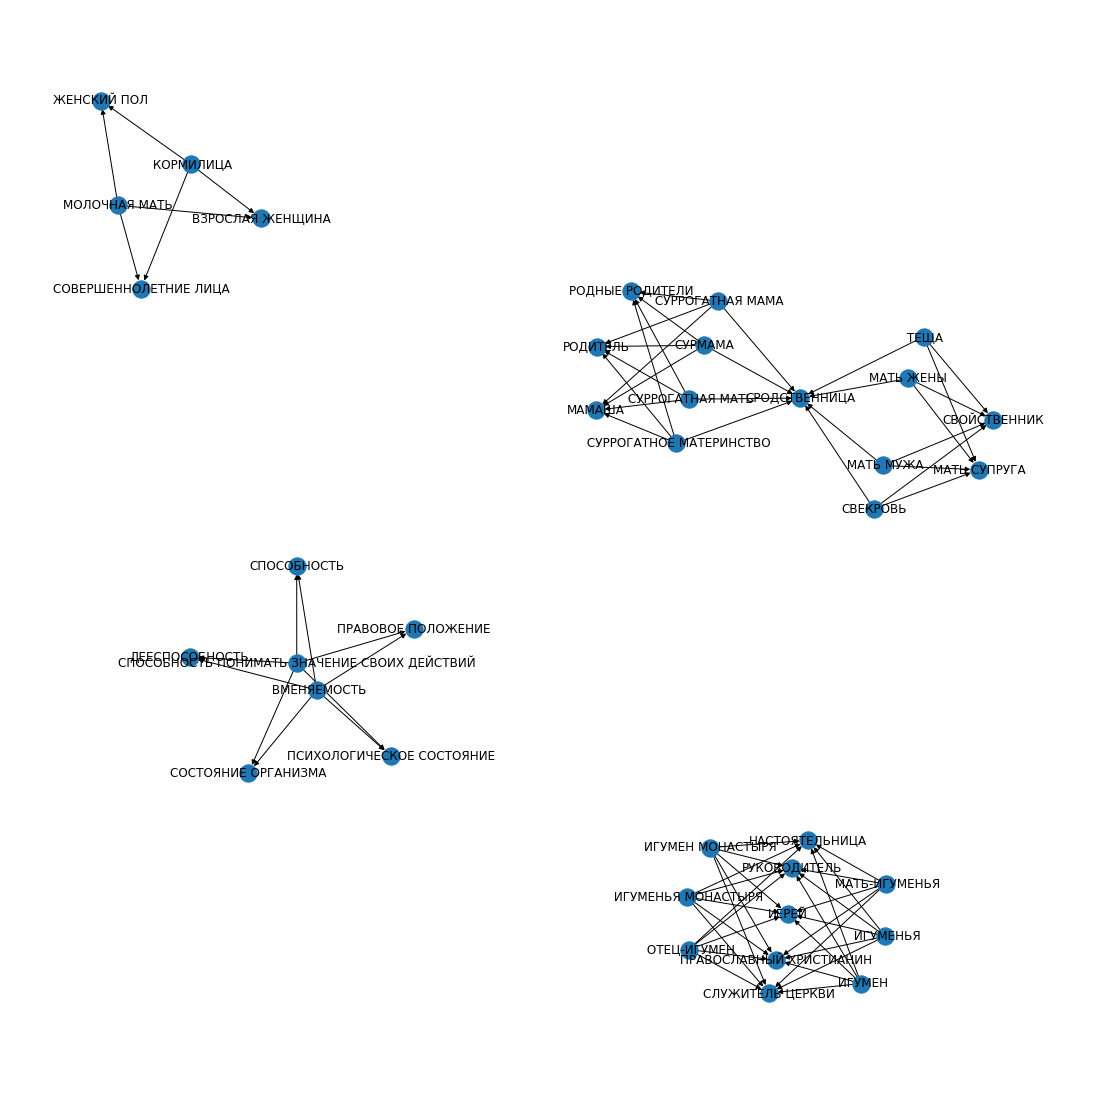

In [12]:
button = widgets.Button(description="Draw")
query = widgets.Text(
    value='МАТЬ',
    placeholder='Query',
    description='String:',
    disabled=False
)
display(button,query)




def creategraph(df):
    res = []
    for row in df.values:
        cohyps = row[1].split(",")
        for idx,cohyp in enumerate(cohyps):
            for parent in json.loads(prestr(row[2])):
                res.append((row[0]+'-'+str(idx),parent))
    return res

def graphdraw(b):
    print("graphdraw",query.value)
    subset = df[df['TEXT'].str.contains(query.value.upper())]
    g = nx.DiGraph()
    for el in subset.values:
        cohyps = el[1].split(",")
        print(cohyps)
        syns = idx2syns[el[0]]
        for child in cohyps:
            for parent in json.loads(prestr(el[2])):
                ed = g.add_edge(child,idx2syns[parent],label="is a")
            
    plt.figure(figsize=(15,15))
    pos = nx.nx_agraph.graphviz_layout(g)
    nx.draw(g,with_labels=True,pos=pos)
#     edge_labels=nx.draw_networkx_edge_labels(g,pos=pos)
    plt.show()
button.on_click(graphdraw)

In [13]:
pip install yargy


     |████████████████████████████████| 51kB 159kB/s eta 0:00:01
     |████████████████████████████████| 51kB 251kB/s eta 0:00:011
     |████████████████████████████████| 7.1MB 1.4MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=a34eec47335f4ef2f2ef90b1ffd980e633df586b56977bfd5e0d02086546190b
  Stored in directory: /Users/ilshatkhairakhun/Library/Caches/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt
ERROR: conda-verify 3.4.2 has requirement backports.functools-lru-cache>=1.4, but you'll have backports-functools-lru-cache 1.3 which is incompatible.
  Found existing installation: backports.functools-lru-cache 1.5
    Uninstalling backports.functools-lru-cache-1.5:
      Successfully uninstalled backports.functools-lru-cache-1.5
Note: you may need to restart the kernel to use updated packages.


In [14]:
from yargy.tokenizer import MorphTokenizer


tokenizer = MorphTokenizer()
text = '''Ростов-на-Дону
Длительностью 18ч. 10мин.
Яндекс.Такси
π ≈ 3.1415
1 500 000$
http://vk.com
'''
for line in text.splitlines():
    print([_.value for _ in tokenizer(line)])

['Ростов', '-', 'на', '-', 'Дону']
['Длительностью', '18', 'ч', '.', '10', 'мин', '.']
['Яндекс', '.', 'Такси']
['π', '≈', '3', '.', '1415']
['1', '500', '000', '$']
['http', ':', '/', '/', 'vk', '.', 'com']


In [15]:
from yargy import or_, rule
from yargy.predicates import normalized

RULE = or_(
    rule(normalized('dvd'), '-', normalized('диск')),
    rule(normalized('видео'), normalized('файл'))
)

In [16]:
from yargy import Parser
from yargy.pipelines import morph_pipeline


RULE = morph_pipeline([
    'dvd-диск',
    'видео файл',
    'видеофильм',
    'газета',
    'электронный дневник',
    'эссе',
])

parser = Parser(RULE)
text = 'Видео файл на dvd-диске'
for match in parser.findall(text):
    print([_.value for _ in match.tokens])

['Видео', 'файл']
['dvd', '-', 'диске']


In [17]:
from yargy import Parser, rule, and_
from yargy.predicates import gram, is_capitalized, dictionary


GEO = rule(
    and_(
        gram('ADJF'),  # так помечается прилагательное, остальные пометки описаны в
                       # http://pymorphy2.readthedocs.io/en/latest/user/grammemes.html
        is_capitalized()
    ),
    gram('ADJF').optional().repeatable(),
    dictionary({
        'федерация',
        'республика'
    })
)


parser = Parser(GEO)
text = '''
В Чеченской республике на день рождения ...
Донецкая народная республика провозгласила ...
Башня Федерация — одна из самых высоких ...
'''
for match in parser.findall(text):
    print([_.value for _ in match.tokens])

['Чеченской', 'республике']
['Донецкая', 'народная', 'республика']


In [18]:
from yargy import and_, not_
from yargy.tokenizer import MorphTokenizer
from yargy.predicates import is_capitalized, eq


tokenizer = MorphTokenizer()
token = next(tokenizer('Стали'))

predicate = is_capitalized()
print(predicate(token))

predicate = and_(
    is_capitalized(),
    not_(eq('марки'))
)
print(predicate(token))

True
True


In [19]:
from yargy import rule, or_


KEY = or_(
    rule('р', '.'),
    rule('размер')
).named('KEY')
VALUE = or_(
    rule('S'),
    rule('M'),
    rule('L'),
    rule('XS'),
).named('VALUE')
SIZE = rule(
    KEY,
    VALUE
).named('SIZE')
SIZE.normalized.as_bnf

SIZE -> KEY VALUE
KEY -> 'р' '.' | 'размер'
VALUE -> 'S' | 'M' | 'L' | 'XS'


In [20]:
parser = Parser(
    SIZE
)
text = 'размер M; размер A; размер XS;'
for match in parser.findall(text):
    print([_.value for _ in match.tokens])

['размер', 'M']
['размер', 'XS']


In [21]:
from yargy import Parser, rule, and_, or_, not_
from yargy.interpretation import fact, attribute
from yargy.predicates import gram, is_capitalized, dictionary, eq
import re
import pandas as pd
from tqdm import tqdm_notebook
from gensim import utils

ModuleNotFoundError: No module named 'gensim'

In [22]:
pip install gensim

     |████████████████████████████████| 24.7MB 942kB/s eta 0:00:01    |█▋                              | 1.2MB 617kB/s eta 0:00:38
     |████████████████████████████████| 71kB 3.3MB/s eta 0:00:011
     |████████████████████████████████| 133kB 4.1MB/s eta 0:00:01
     |████████████████████████████████| 5.9MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 3.5MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.9.0-cp37-none-any.whl size=73088 sha256=ab8f1ea7e62391f8e0e3a3187c115822baa8549bb3e864349dfbb5d0e94dfc0d
  Stored in directory: /Users/ilshatkhairakhun/Library/Caches/pip/wheels/ab/10/93/5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [23]:
from yargy import Parser, rule, and_, or_, not_
from yargy.interpretation import fact, attribute
from yargy.predicates import gram, is_capitalized, dictionary, eq
import re
import pandas as pd
from tqdm import tqdm_notebook
from gensim import utils

In [24]:
START = rule(
    or_(
        rule(gram('ADJF')),
        rule(gram('NOUN'))
    ).optional(),
    gram('NOUN')
)

START_S = or_(
    eq('такой'),
    eq('такие'),
)

KAK = eq('как')
INCLUDING = or_(
    or_(
        eq('в'),
        eq('том'),
        eq('числе'),
    ),
    eq('включающий'),
    or_(
        eq('включающий'),
        eq('в'),
        eq('себя'),
    ),
    or_(
        eq('включающие'),
        eq('в'),
        eq('себя'),
    ),
    eq('включающие'),
    eq('особенно'),

)

MID_S = or_(
    rule(
        or_(
            eq('такой'),
            eq('такие'),
        ),
        eq('как')
    )
)
ATAKJE = rule(
    eq(','),
    eq('а'),
    eq('также')
)

MID = or_(
    rule(
        eq('это')
    ),
    rule(
        eq('—')
    ),
    rule(
        eq('—'),
        eq('это')
    ),
    rule(
        eq('—'),
        not_(eq('км'))
    ),
    rule(
        or_(
            eq('и'),
            eq('или'),
        ),
        eq('другие')
    )
)

END = or_(
    rule(
        gram('NOUN'),
        gram('NOUN')
    ),
    rule(
        gram('ADJF').repeatable(),
        gram('NOUN')
    ),
    rule(
        gram('ADJF'),
        gram('ADJF').repeatable(),
        gram('NOUN')
    ),
    rule(
        gram('NOUN').repeatable(),
        gram('ADJF'),
        gram('NOUN').repeatable()
    ),
    rule(
        gram('NOUN').repeatable()
    )
)

Item = fact(
    'Item',
    [attribute('titles').repeatable()]
)


IGNORE = rule(
    '(',
    not_(eq(')')).repeatable(),
    ')'
)

ITEM = rule(
    IGNORE.interpretation(
        Item.titles
    ),
    eq(',').optional() 
).repeatable().interpretation(
    Item
)

In [25]:
def get_hyperonyms(main_word):
    HYPONYM = eq(utils.deaccent(main_word))
    RULE = or_(
        rule(HYPONYM, ATAKJE, START, MID, END),
        rule(HYPONYM, MID, END),
        rule(START_S, END, KAK, HYPONYM),
        rule(END, INCLUDING, HYPONYM)
    )
    parser = Parser(RULE) 
    text = utils.deaccent(wikipedia.summary(main_word))
    print(text)
    text = re.sub(r'\(.+?\)', '', text)
    text = text.lower().replace('* сергии радонежскии* ', '')
    for idx, match in enumerate(parser.findall(text.lower())):
        k = [_.value for _ in match.tokens]
        print(k)

In [26]:
get_hyperonyms("ПОВИЛИКА")

Повилика (лат. Cuscuta) — род паразитических растении семеиства Вьюнковые, все виды которого отнесены к категории карантинных сорняков.
Ранее выделяли отдельное семеиство Повиликовые (Cuscutaceae), состоящее из одного рода — Повилика. Современные генетические исследования показали, что правильнее относить этот род к трибе Повиликовые семеиства Вьюнковые.
